In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import tensorflow as tf

In [ ]:
import sys
!{sys.executable} -m pip install librosa


In [3]:
import librosa

audio_file = '.au'
audio_data, sr = librosa.load(r'C:\Users\sidda\Sid\Projects\data\genres\blues\blues.00000.au')


In [4]:
audio_data

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

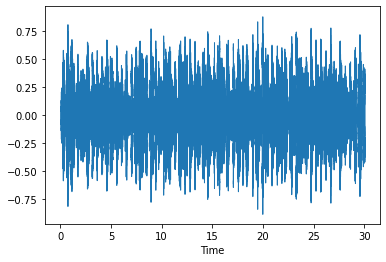

In [5]:
librosa.display.waveshow(audio_data)

In [6]:
import os

dircs = []
for (root,dirs,files) in os.walk('.\data\genres', topdown=True):
    if (dirs!=[]):
        for i in dirs:
            dircs.append(i)       

In [7]:
music_paths = {}
i = 0
for (root, dirs, files) in os.walk('.\data\genres', topdown=True):
    if files!=[]:
        music_paths[dircs[i]] = []
        for file in files:
            music_paths[dircs[i]].append(os.path.join(root, file))
        i+=1

In [8]:
y, sr = {}, []
for (i,j) in music_paths.items():
    y[i] = []
    for k in j:
        temp, sr = librosa.load(k)
        y[i].append(temp)
    

In [9]:
for i,j in y.items():
    print(len(j))

100
100
100
100
100
100
100
100
100
100


In [10]:
def choosing_music(loads):
    random_choice = np.random.randint(0, 100)
    rand2 = np.random.randint(0, 10)
    choices = []
    which_folders_song = []
    keys_list = list(loads.keys())
    for genre, file in loads.items():
        if (keys_list.index(genre) == rand2):
            choices.append(file[random_choice])
            which_folders_song.append(genre)
    return (np.array(choices), which_folders_song)



In [14]:
x, t = choosing_music(y)

In [15]:
x

array([[ 0.00064087, -0.00097656,  0.00247192, ..., -0.01867676,
         0.02722168, -0.03652954]], dtype=float32)

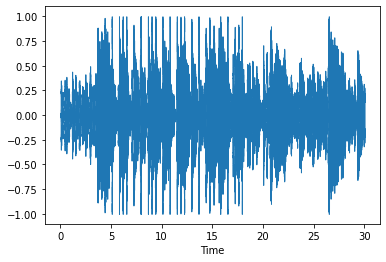

In [16]:
librosa.display.waveshow(x)

In [17]:
def plot_loading_wav(loads, files):
    
    choise_f = []
    which_folders_song = []
    colors = ['red', 'green', 'blue', 'yellow', 'black']

    for i in range(5):
        a, b = choosing_music(loads)
        choise_f.append(a)
        which_folders_song.append(b)
    
    def iterate_plot(label = None, choise=None, sr=22050, ax=None, color="blue", title=False):
        
        librosa.display.waveshow(choise, sr=22050, ax=ax,color=color,
                                 label=label)
        
        if title:
            ax.set(title="Music wave show")
        ax.label_outer()
        ax.legend()
        
    fig = plt.figure(figsize=(8, 6))
    
    ax = fig.subplots(nrows=5)
    
    for i in range(5):
        iterate_plot(label=f"Genre Blues, Song: {which_folders_song[i]}", choise=choise_f[i],
                ax=ax[i], color=colors[i], title=True)

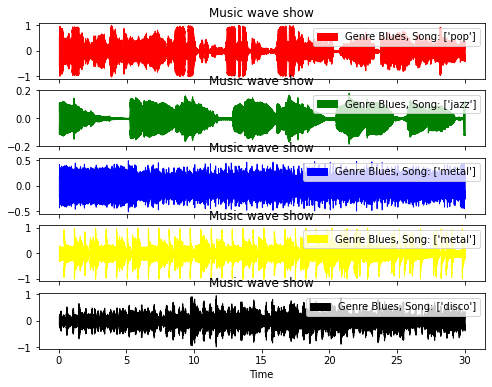

In [18]:
plot_loading_wav(y, music_paths)

### Feature Extraction

In [19]:
# MFCCs

In [20]:
t1 = y['blues'][0]

In [21]:
len(t1)

661794

In [22]:
#Testing on a single audio sample
y_1, sr_1 = librosa.load(librosa.ex('libri1'))

In [23]:
S = librosa.feature.melspectrogram(y=t1, sr=sr, n_mels=128,
                                   fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(S))

array([[-218.43207   , -186.93909   , -168.85771   , ...,  -74.47025   ,
         -51.134186  ,  -50.329113  ],
       [  78.71535   ,   77.24283   ,   77.74002   , ...,  113.275986  ,
         101.494995  ,  104.41112   ],
       [   8.112654  ,   11.304863  ,   25.94863   , ...,  -34.321224  ,
         -10.350467  ,   -3.4817748 ],
       ...,
       [   6.751457  ,    4.4781365 ,    3.890352  , ...,   -8.763784  ,
          -0.912691  ,    0.7252313 ],
       [  -1.342452  ,   -2.223036  ,   -3.8171358 , ...,   -0.85409695,
           0.8640338 ,    4.851968  ],
       [   5.2040973 ,    2.45483   ,    0.91555285, ...,   -0.5174076 ,
          -2.5022807 ,   -1.475643  ]], dtype=float32)

In [24]:
vis = librosa.feature.mfcc(y=y['blues'][0], sr=sr_1)

In [25]:
mfccs = librosa.feature.mfcc(y=t1, sr=sr, n_mfcc=40)

[Text(0.5, 1.0, 'MFCC')]

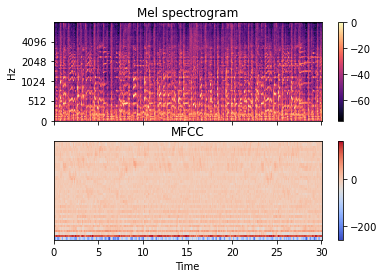

In [26]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')


In [63]:
def mfcc_features(y, sr):
    mfcc_features = {}
    for (i,j) in y.items():
        mfcc_features[i] = [librosa.feature.mfcc(y = j[k], sr = sr) for k in range(len(j))]
    return mfcc_features

In [64]:
mfcc = mfcc_features(y, sr)

In [66]:
mfcc['blues'][0]

array([[-240.63542   , -211.21436   , -193.90889   , ..., -109.999146  ,
         -86.81442   ,  -84.073586  ],
       [  99.647644  ,  101.04283   ,  102.24396   , ...,  150.07935   ,
         138.94867   ,  138.30977   ],
       [  -7.4032774 ,   -8.358528  ,    1.9154348 , ...,  -50.795135  ,
         -36.536144  ,  -28.136356  ],
       ...,
       [   9.74149   ,    6.369472  ,    3.6500251 , ...,   -2.857153  ,
          -6.2137365 ,   -0.49142766],
       [   3.5908713 ,    4.05085   ,    4.788997  , ...,   -7.574688  ,
          -8.446719  ,   -6.7805657 ],
       [   5.348016  ,    3.2318478 ,    0.94024634, ...,   -7.5553374 ,
           0.30610925,    3.5234983 ]], dtype=float32)

In [103]:
def plot_spectogram(spectogram, sr=22050, hop_length=512, xlabel="Time", ylabel="Frequency"):
    fig = plt.figure(figsize = (8, 6), dpi = 200)
    librosa.display.specshow(spectogram, sr = sr, hop_length = hop_length)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar()
    plt.show()

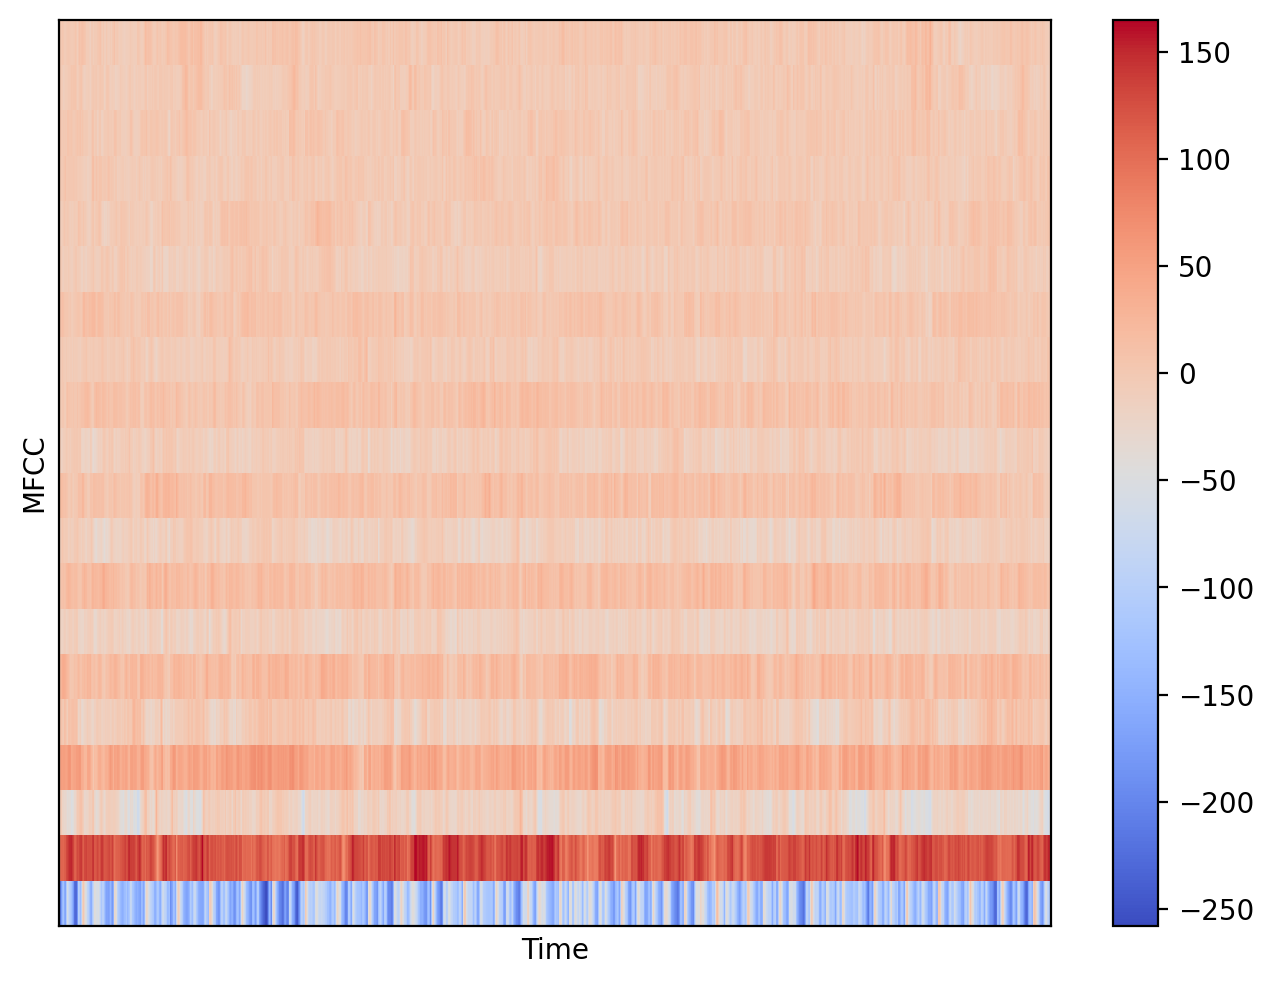

In [104]:
plot_spectogram(mfcc['blues'][0], ylabel="MFCC")
# We can see the 13 different coefficients of our MFCC features as a bar in this spectogram

### Processing files (Implemented as function for future use)

In [119]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, sample_rate=22050, duration=30, samples_per_track=661500,hop_length=512,num_segments=5):
    # Dictionary to stoure our data
    data ={
        "mapping" : [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment = int(samples_per_track / num_segments)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment/ hop_length)
    
    # Loop through all the genres
    for i, (dirpath,dirnames,filenames) in enumerate(os.walk(dataset_path, topdown=True)):
        
        # Ensure we're not at the root level itself
        if dirpath is not dataset_path:
            
            # Save the semantic label
            dirpath_components = dirpath.split("/") # genre/blues => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing {} ...".format(semantic_label))
            
            #process files for each genre
            for f in filenames:
                
                #Load audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = sample_rate)
                
                # process segments extracting mfcc and storing data
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s #s=0 -> 0
                    finish_sample = start_sample + num_samples_per_segment #s=0 -> num_samples_per_segment
                    
                    
                    
                    mfcc = librosa.feature.mfcc(y = signal[start_sample:finish_sample],sr = sr, n_fft = n_fft, n_mfcc = n_mfcc,hop_length = hop_length)                                    
                    mfcc = mfcc.T
                                                                          
                    # store the mfcc for segment if it has the expected segment length
                    if (len(mfcc) == expected_num_mfcc_vectors_per_segment):
                        data["mfcc"].append(mfcc.tolist()) # numpy to list for json
                        data["labels"].append(i-1)
                        #print("{}, segment:{}".format(file_path, s))
                                                       
                                                       
                                                       
                     
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
                                                       
    
                                                       
          
        
        

In [197]:
data_path = './data/genres'
json_path = "data.json"

In [198]:
save_mfcc(dataset_path = data_path, json_path = json_path, num_segments = 10)


Processing genres\blues ...

Processing genres\classical ...

Processing genres\country ...

Processing genres\disco ...

Processing genres\hiphop ...

Processing genres\jazz ...

Processing genres\metal ...

Processing genres\pop ...

Processing genres\reggae ...

Processing genres\rock ...


### Neural Network for Classification:

In [199]:
#Loading data
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
    
    # Convert lists into numpy arrays
    
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

In [200]:
inputs, targets = load_data(json_path)

In [201]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size = 0.3)

In [202]:
inputs.shape

(9996, 130, 13)

In [203]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation="softmax")   #Output units (10 categories)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

history = model.fit(inputs_train, targets_train, 
          validation_data=(inputs_test, targets_test),
          epochs=100,
          batch_size=32)
    

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 1690)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               865792    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                16448     
                                                                 
 dropout_11 (Dropout)        (None, 64)               

### Identifying and reducing overfitting

In [204]:
def plot_history(history):
    
    fig, ax = plt.subplots(2)
    
    #create accuracy subplot
    ax[0].plot(history.history["accuracy"], label="train accuracy")
    ax[0].plot(history.history["val_accuracy"], label="test accuracy")
    ax[0].set_ylabel("Accuracy")
    ax[0].set_xlabel("Epoch")
    ax[0].legend(loc="lower right")
    ax[0].set_title("Accuracy eval")
    
    #create error subplot
    ax[1].plot(history.history["loss"], label="train error")
    ax[1].plot(history.history["val_loss"], label="test error")
    ax[1].set_ylabel("Error")
    ax[1].set_xlabel("Epoch")
    ax[1].legend(loc="lower right")
    ax[1].set_title("Error eval")
    
    plt.subplots_adjust(top=0.85, bottom=0.1, hspace=0.7)
    plt.show()
    


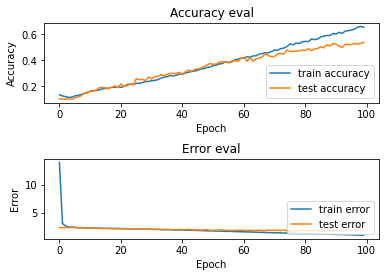

In [205]:
plot_history(history)

### Using CNNs

In [206]:
def prepare_datasets(test_size, validation_size):
    
    """ Returns the validation and test split (test_size, validation_size"""
    
    #load_data
    X, y = load_data(json_path)
    
    # Create train/test splot
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Create train/validation set
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    
    # 3d array ->(x, y, rgb/gray 3/1)
    X_train = X_train[..., np.newaxis] # So far axes + extra dimension, in this case: 3d -> 4d
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test
    
    

In [207]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(test_size=0.25,
                                                                               validation_size=0.25)

In [208]:
def build_model(input_shape):
    
    # create model
    model = tf.keras.Sequential()
    
    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))       
    model.add(tf.keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
        
    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))       
    model.add(tf.keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    
    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation="relu", input_shape=input_shape))       
    model.add(tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    
    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.3))        
    
    # output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model
    
    

In [209]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
model = build_model(input_shape)

In [210]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [211]:
model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
176/176 [==============================] - 3s 11ms/step - loss: 2.3791 - accuracy: 0.2175 - val_loss: 1.8964 - val_accuracy: 0.3445
Epoch 2/30
176/176 [==============================] - 2s 10ms/step - loss: 1.8415 - accuracy: 0.3748 - val_loss: 1.5861 - val_accuracy: 0.4411
Epoch 3/30
176/176 [==============================] - 2s 11ms/step - loss: 1.6561 - accuracy: 0.4217 - val_loss: 1.4553 - val_accuracy: 0.4757
Epoch 4/30
176/176 [==============================] - 2s 10ms/step - loss: 1.5236 - accuracy: 0.4598 - val_loss: 1.3863 - val_accuracy: 0.5035
Epoch 5/30
176/176 [==============================] - 2s 10ms/step - loss: 1.4419 - accuracy: 0.4913 - val_loss: 1.3164 - val_accuracy: 0.5259
Epoch 6/30
176/176 [==============================] - 2s 11ms/step - loss: 1.3758 - accuracy: 0.5153 - val_loss: 1.2670 - val_accuracy: 0.5435
Epoch 7/30
176/176 [==============================] - 2s 11ms/step - loss: 1.3188 - accuracy: 0.5247 - val_loss: 1.2259 - val_accuracy: 0.5600

In [295]:
# Evaluate the cnn on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy on test set is: {}".format(test_accuracy))

Accuracy on test set is: 0.7010804414749146


In [213]:
def label_mapping(index):
    labels = ["disco","reggae","rock","pop","blues","country","jazz","classical","metal","hiphop"]
    return labels[index]

In [315]:
def predict(model, X, y):
    X = X[np.newaxis, ...]
    prediction = (model.predict(X)).flatten() # X.shape -> (1, 130, 13, 1)
    
    #pred_ind = np.argmax(prediction, axis = 1)
    
    #print(pred_ind)
    
      # prediction = [ [0.1, 0.2, ...] ] scores of 10 samples
    strs = []
    prs = []
  
    for i in range(len(prediction)):
        pr = float(prediction[i]*100)
        prs.append(pr)
        s = "This song has a {} % chance of being a {} song".format(round(pr, 2),label_mapping(i))
        #print(s)
        strs.append(s)
        
    
    
    for i in range(len(prediction)):
        max_index = prs.index(max(prs))
        print(strs[max_index])
        prs.pop(max_index)
        strs.pop(max_index)
    
  

In [326]:
# Make prediction on a sample
X_sample = X_test[234]
y_sample = y_test[234]
predict(model, X_sample, y_sample)

1/1 [==============================] - 0s 16ms/step
This song has a 57.21 % chance of being a rock song
This song has a 29.54 % chance of being a disco song
This song has a 10.55 % chance of being a hiphop song
This song has a 1.16 % chance of being a pop song
This song has a 0.69 % chance of being a blues song
This song has a 0.48 % chance of being a jazz song
This song has a 0.26 % chance of being a metal song
This song has a 0.08 % chance of being a country song
This song has a 0.02 % chance of being a classical song
This song has a 0.01 % chance of being a reggae song


In [327]:
label_mapping(y_sample)

'rock'